<a href="https://colab.research.google.com/github/MatejS-code/pythonfordataanalysis/blob/main/0_Begin__Demo_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **An Analysis of Kiva Crowdfunded Loans**

###### *Matej Saric: Udemy Course Project Demo*
---



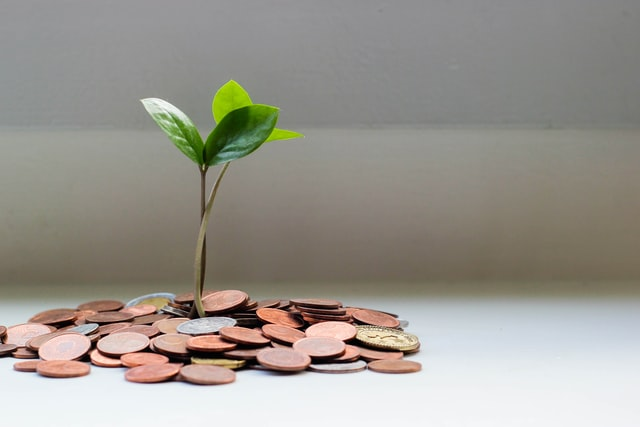

<span>Photo by <a href="https://unsplash.com/@micheile?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Micheile Henderson</a> on <a href="https://unsplash.com/s/photos/money?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

<br><br>

***Project structure:***


1.   Define the objective
2.   Import packages and data
3.   Explore and clean
4.   Analyze

<br>

## **Objective**
---

*Analyze the [Kiva.org](https://www.kiva.org/) lending platform. Understand how much money has been borrowed, for what purpose, and where the borrowers live.*

<br>

In particular, we want to answer the following groups of questions:



1.   How much money has been borrowed through Kiva's lending platform? How has the amount of funding changed over time?
2.   How much funding has been provided by category (theme)?
3.   How does funding vary by world region? What are the most popular themes in each region?


<br><br>

## **Import Packages and Data**
---


The data for this project comes from [Kaggle.com](https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding). It includes information about loans funded between January 1, 2016 and July 26th, 2017.

The data is also stored on the GitHub page for the course [here](https://github.com/The-Calculated-Life/python_analysis_for_excel/tree/main/data)

In [292]:
!pip install squarify

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify

plt.rcParams['figure.figsize'] = (12, 6)

In [294]:
kiva_loans_path = 'https://raw.githubusercontent.com/The-Calculated-Life/python_analysis_for_excel/refs/heads/main/data/kiva_loans.csv'

locations_path = 'https://raw.githubusercontent.com/The-Calculated-Life/python_analysis_for_excel/refs/heads/main/data/kiva_mpi_region_locations.csv'

kiva_loans = pd.read_csv(kiva_loans_path)
locations = pd.read_csv(locations_path)

<br><br>

## **Explore and Clean Data**
---

### kiva_loans dataframe

In [295]:
kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,country_code,country,region,currency,partner_id,term_in_months,lender_count,repayment_interval,date
0,1002924,500,500,Rickshaw,Transportation,PK,Pakistan,Multan,PKR,247.0,14,1,monthly,1/1/2016
1,1002908,500,500,Rickshaw,Transportation,PK,Pakistan,Lahore,PKR,247.0,11,1,irregular,1/1/2016
2,1002897,500,500,Fruits & Vegetables,Food,PK,Pakistan,Multan,PKR,247.0,15,17,monthly,1/1/2016
3,1002916,500,500,Clothing Sales,Clothing,PK,Pakistan,Lahore,PKR,247.0,11,16,irregular,1/1/2016
4,1002891,575,575,Fruits & Vegetables,Food,PK,Pakistan,Lahore,PKR,247.0,11,21,irregular,1/1/2016


In [296]:
kiva_loans.shape

(315138, 14)

In [297]:
kiva_loans.isnull().sum()

,0
id,0
funded_amount,0
loan_amount,0
activity,0
sector,0
country_code,4
country,0
region,16367
currency,0
partner_id,3070


In [298]:
kiva_loans['date'] = pd.to_datetime(kiva_loans['date'])
kiva_loans = kiva_loans.set_index('date')

In [299]:
kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,country_code,country,region,currency,partner_id,term_in_months,lender_count,repayment_interval
date,,,,,,,,,,,,,
2016-01-01,1002924,500,500,Rickshaw,Transportation,PK,Pakistan,Multan,PKR,247.0,14,1,monthly
2016-01-01,1002908,500,500,Rickshaw,Transportation,PK,Pakistan,Lahore,PKR,247.0,11,1,irregular
2016-01-01,1002897,500,500,Fruits & Vegetables,Food,PK,Pakistan,Multan,PKR,247.0,15,17,monthly
2016-01-01,1002916,500,500,Clothing Sales,Clothing,PK,Pakistan,Lahore,PKR,247.0,11,16,irregular
2016-01-01,1002891,575,575,Fruits & Vegetables,Food,PK,Pakistan,Lahore,PKR,247.0,11,21,irregular


<br> <br>

### location dataframe

In [300]:
locations.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [301]:
locations.shape

(2772, 9)

In [302]:
locations.isnull().sum()

,0
LocationName,1788
ISO,1764
country,1764
region,1788
world_region,1764
MPI,1788
geo,0
lat,1880
lon,1880


In [303]:
locations[(locations['world_region'].isnull()) & locations['country'].notnull()]

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon


In [304]:
locations_no_null = locations.dropna()
locations_no_null

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210
...,...,...,...,...,...,...,...,...,...
1003,"Mashonaland West, Zimbabwe",ZWE,Zimbabwe,Mashonaland West,Sub-Saharan Africa,0.192,"(-17.4851029, 29.7889248)",-17.485103,29.788925
1004,"Masvingo, Zimbabwe",ZWE,Zimbabwe,Masvingo,Sub-Saharan Africa,0.174,"(-20.0791909, 30.8384093)",-20.079191,30.838409
1005,"Matabeleland North, Zimbabwe",ZWE,Zimbabwe,Matabeleland North,Sub-Saharan Africa,0.238,"(-18.5331566, 27.5495846)",-18.533157,27.549585
1006,"Matabeleland South, Zimbabwe",ZWE,Zimbabwe,Matabeleland South,Sub-Saharan Africa,0.164,"(-21.052337, 29.0459927)",-21.052337,29.045993


<br><br>


## **Analysis**
---

### **Q. How much money has been borrowed through Kiva's lending platform?**


In [305]:
funded_milions = np.round(kiva_loans['funded_amount'].sum()/1000000,1)
funded_milions

232.5

In [306]:
print('The funded amount is ' + str(round(funded_milions,1)) + ' million dollars')

The funded amount is 232.5 million dollars


In [307]:
target_reached = (kiva_loans['funded_amount'].sum())/((kiva_loans)['loan_amount'].sum())
target_reached

0.9122883326416508

In [308]:
f'{target_reached:.0%}'

'91%'

In [309]:
print('The reached target of Kiva fundings is: ' + str(f'{target_reached:.0%}'))

The reached target of Kiva fundings is: 91%


<br><br>

### **Q. How has the amount of funding changed over time?**


In [310]:
loans_by_day = kiva_loans.groupby('date')['funded_amount'].sum()
#this dataframe needs to be resampled to month, to get a better overview

In [311]:
loans_by_month = loans_by_day.resample('M').sum()

<ipython-input-311-8d513a23e78b>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  loans_by_month = loans_by_day.resample('M').sum()


In [312]:
loans_by_month.index

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31'],
              dtype='datetime64[ns]', name='date', freq='ME')

In [313]:
loans_by_month_no_06 = loans_by_month[loans_by_month.index < '2017-06-01']

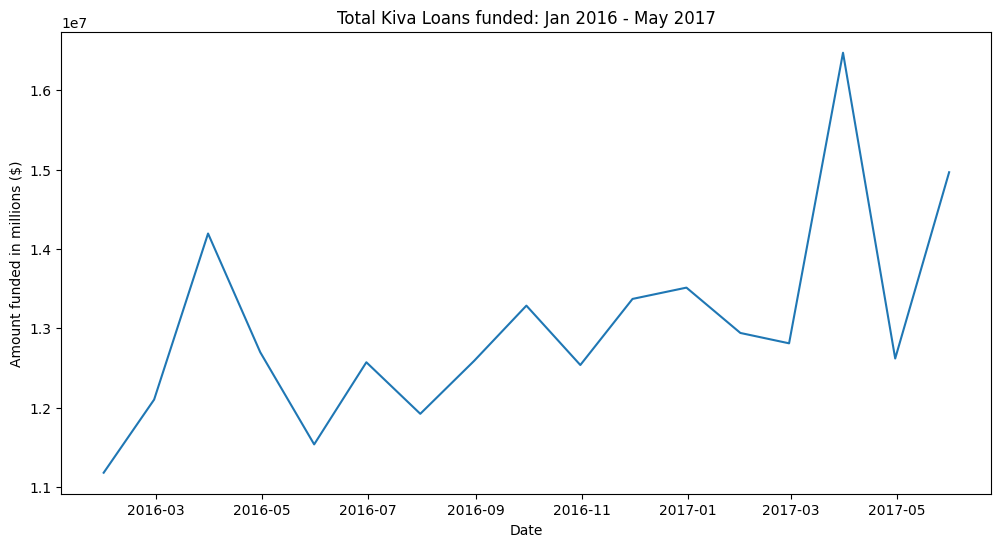

In [314]:
plt.plot(loans_by_month_no_06)
plt.title('Total Kiva Loans funded: Jan 2016 - May 2017')
plt.xlabel('Date')
plt.ylabel('Amount funded in millions ($)')
plt.show()

<br><br>

### **Q. How much funding has been provided by sector?**

In [315]:
funding_per_sector = kiva_loans.groupby('sector')['funded_amount'].sum()

funding_per_sector_index = funding_per_sector.reset_index()
funding_per_sector_index.sort_values(by='funded_amount',ascending=False,inplace=True)
funding_per_sector_index

,sector,funded_amount
0,Agriculture,59250600
6,Food,51103125
11,Retail,38895405
12,Services,18581350
2,Clothing,14973750
4,Education,14113050
8,Housing,8303500
10,Personal Use,7305300
1,Arts,5820025
7,Health,4740050


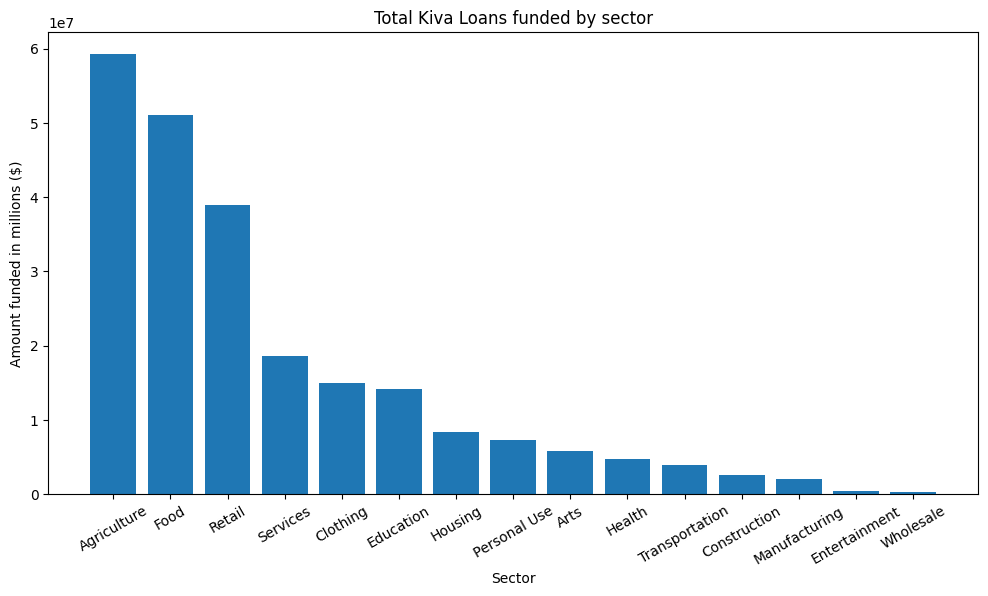

In [316]:
plt.bar(x='sector', height='funded_amount',data=funding_per_sector_index)
plt.title('Total Kiva Loans funded by sector')
plt.xlabel('Sector')
plt.ylabel('Amount funded in millions ($)')
plt.xticks(rotation=30)
plt.show()

<br><br>

### **Q. How does funding vary by world region?**


In [317]:
kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,country_code,country,region,currency,partner_id,term_in_months,lender_count,repayment_interval
date,,,,,,,,,,,,,
2016-01-01,1002924,500,500,Rickshaw,Transportation,PK,Pakistan,Multan,PKR,247.0,14,1,monthly
2016-01-01,1002908,500,500,Rickshaw,Transportation,PK,Pakistan,Lahore,PKR,247.0,11,1,irregular
2016-01-01,1002897,500,500,Fruits & Vegetables,Food,PK,Pakistan,Multan,PKR,247.0,15,17,monthly
2016-01-01,1002916,500,500,Clothing Sales,Clothing,PK,Pakistan,Lahore,PKR,247.0,11,16,irregular
2016-01-01,1002891,575,575,Fruits & Vegetables,Food,PK,Pakistan,Lahore,PKR,247.0,11,21,irregular


In [318]:
locations.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [319]:
merged_datasets = kiva_loans.merge(locations,on='country',how='left')
merged_datasets.head()

,id,funded_amount,loan_amount,activity,sector,country_code,country,region_x,currency,partner_id,...,lender_count,repayment_interval,LocationName,ISO,region_y,world_region,MPI,geo,lat,lon
0,1002924,500,500,Rickshaw,Transportation,PK,Pakistan,Multan,PKR,247.0,...,1,monthly,"Punjab, Pakistan",PAK,Punjab,South Asia,0.184,"(31.1704063, 72.7097161)",31.170406,72.709716
1,1002924,500,500,Rickshaw,Transportation,PK,Pakistan,Multan,PKR,247.0,...,1,monthly,"Sindh, Pakistan",PAK,Sindh,South Asia,0.294,"(25.8943018, 68.52471489999999)",25.894302,68.524715
2,1002924,500,500,Rickshaw,Transportation,PK,Pakistan,Multan,PKR,247.0,...,1,monthly,"Khyber Pakhtunkhwa, Pakistan",PAK,Khyber Pakhtunkhwa,South Asia,0.247,"(34.9526205, 72.331113)",34.952621,72.331113
3,1002924,500,500,Rickshaw,Transportation,PK,Pakistan,Multan,PKR,247.0,...,1,monthly,"Balochistan, Pakistan",PAK,Balochistan,South Asia,0.402,"(28.4907332, 65.0957792)",28.490733,65.095779
4,1002924,500,500,Rickshaw,Transportation,PK,Pakistan,Multan,PKR,247.0,...,1,monthly,"Gilgit Baltistan, Pakistan",PAK,Gilgit Baltistan,South Asia,0.233,"(35.80256670000001, 74.9831808)",35.802567,74.983181


In [320]:
funded_by_w_region = merged_datasets.groupby('world_region')['funded_amount'].sum()
funded_by_w_region.sort_values(ascending=False,inplace=True)
funded_by_w_region

,funded_amount
world_region,
Latin America and Caribbean,838129275
East Asia and the Pacific,699477325
Sub-Saharan Africa,445966500
South Asia,44067975
Europe and Central Asia,38629225
Arab States,26816700


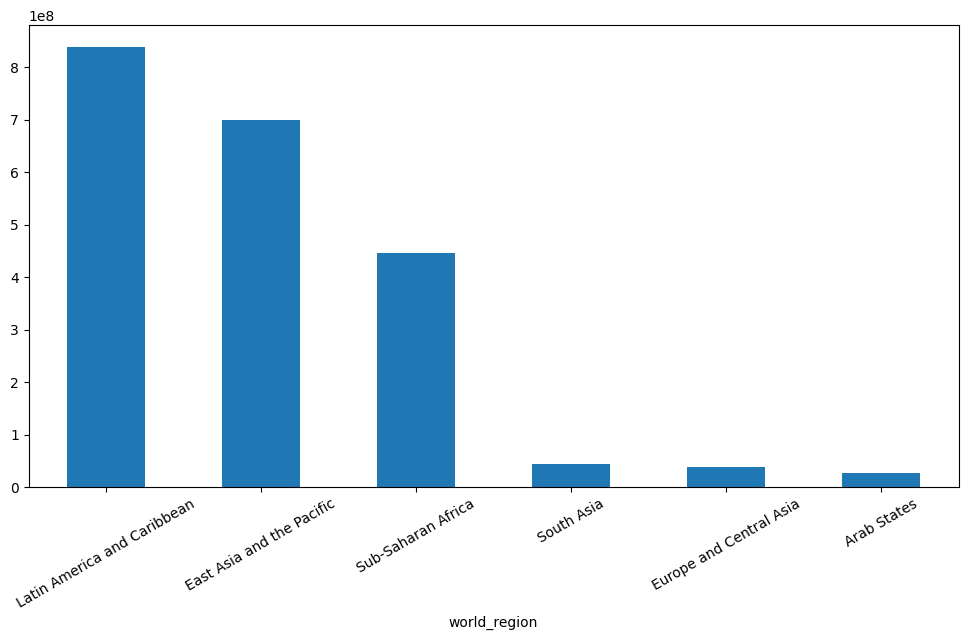

In [321]:
funded_by_w_region.plot.bar()
plt.xticks(rotation=30)
plt.show()

In [322]:
colors = [(0.953125720876586, 0.9822068435217225, 0.9426989619377163, 1.0),
 (0.12110726643598617, 0.5312572087658592, 0.2590542099192618, 1.0),
 (0.9686274509803922, 0.9882352941176471, 0.9607843137254902, 1.0),
 (0.0, 0.26666666666666666, 0.10588235294117647, 1.0),
 (0.9664129181084199, 0.9873740868896579, 0.9582006920415225, 1.0),
 (0.4798154555940023, 0.7802537485582468, 0.48322952710495964, 1.0)]

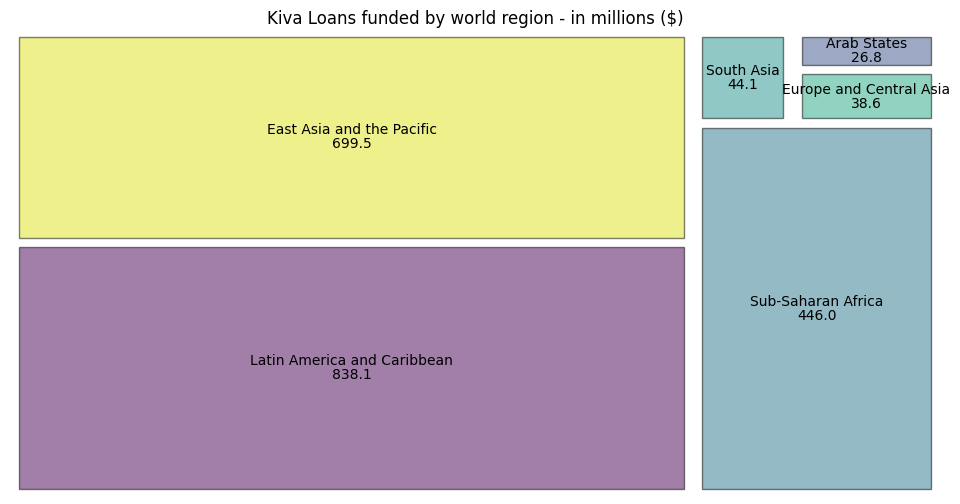

In [323]:
squarify.plot(sizes=funded_by_w_region,
              label=funded_by_w_region.index,
              #color=colors,
              alpha=0.5,
              edgecolor='black',
              pad=True,
              value=np.round(funded_by_w_region.values/1000000,1)
             )
plt.title('Kiva Loans funded by world region - in millions ($)')
plt.axis('off')
plt.show()

<br><br>

### **Q. What are the most popular sectors in each region?**

In [324]:
sector_region_pivot = merged_datasets.pivot_table(index='sector',
                            columns='world_region',
                            values='funded_amount',
                            aggfunc='sum')

In [325]:
sector_region_pivot.style.highlight_max(color='lightgreen',axis=0)

world_region,Arab States,East Asia and the Pacific,Europe and Central Asia,Latin America and Caribbean,South Asia,Sub-Saharan Africa
sector,,,,,,
Agriculture,7051625,195765325,15190625,223012200,5674000,136894275
Arts,241225,12217025,127875,39513750,4466425,3073150
Clothing,2338700,9510925,1604975,62776525,1994125,31220450
Construction,1169500,4558000,207550,11397550,438300,3949475
Education,2401575,12591050,5344125,28917875,6882200,21641925
Entertainment,19500,542300,24400,1002575,40400,317725
Food,5382750,131230725,2745700,209607350,4513225,116751000
Health,35250,2572725,4718450,6967775,157000,4782175
Housing,290325,56439225,2247600,15910300,367475,6166375
